In [6]:
# 基本のライブラリを読み込む
import numpy as np
import pandas as pd
from scipy import stats
 
# グラフ描画
from matplotlib import pylab as plt
import seaborn as sns
%matplotlib inline
 
#グラフを横長にする

from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6

import matplotlib as mpl
mpl.rcParams['font.family'] = ['serif']

In [2]:
df=pd.read_csv('data/merge.csv',encoding="shift-jis")
df.head()

,Unnamed: 0,datetime,曜日,局,視聴率（世帯）,視聴率（個人）,視聴数（世帯）,視聴数（個人）
0,0,2017-01-01 05:00:00,日,HUT,12.8,5.3,2349,2150
1,1,2017-01-01 05:01:00,日,HUT,12.8,5.3,2349,2150
2,2,2017-01-01 05:02:00,日,HUT,12.5,5.2,2294,2109
3,3,2017-01-01 05:03:00,日,HUT,12.5,5.1,2294,2069
4,4,2017-01-01 05:04:00,日,HUT,12.7,5.3,2331,2150


In [3]:
#choose ftv data from merged csv
df_ftv=df.loc[(df['局'] == 'FTV')]
df_ftv_rates=df_ftv[["datetime","視聴率（世帯）","曜日"]]
df_ftv_rates.tail()

,datetime,視聴率（世帯）,曜日
14183995,2020-01-01 04:55:00,0.4,火
14183996,2020-01-01 04:56:00,0.4,火
14183997,2020-01-01 04:57:00,0.4,火
14183998,2020-01-01 04:58:00,0.6,火
14183999,2020-01-01 04:59:00,0.6,火


In [4]:
#save datetime series as datetime formart
df_ftv_rates["datetime"]=pd.to_datetime(df_ftv_rates.datetime)
#set datetime series as index
df_ftv_rates=df_ftv_rates.set_index('datetime')
df_ftv_rates.tail()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,視聴率（世帯）,曜日
datetime,,
2020-01-01 04:55:00,0.4,火
2020-01-01 04:56:00,0.4,火
2020-01-01 04:57:00,0.4,火
2020-01-01 04:58:00,0.6,火
2020-01-01 04:59:00,0.6,火


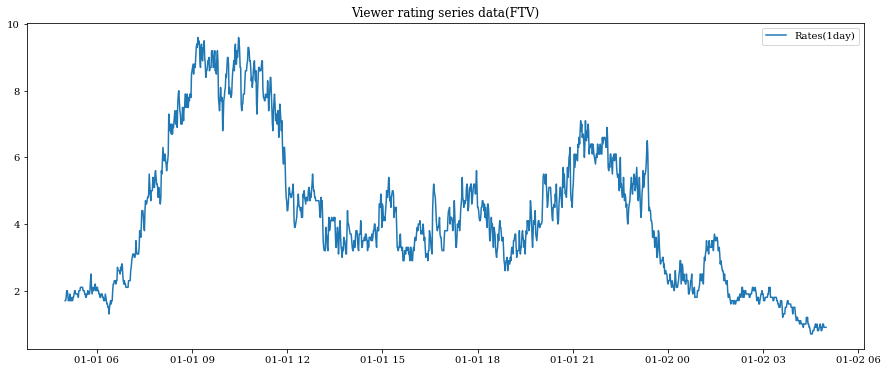

In [7]:
#1日間視聴率
plt.plot(df_ftv_rates[:1440]["視聴率（世帯）"], label='Rates(1day)')
plt.title('Viewer rating series data(FTV)')
plt.legend(loc='best')

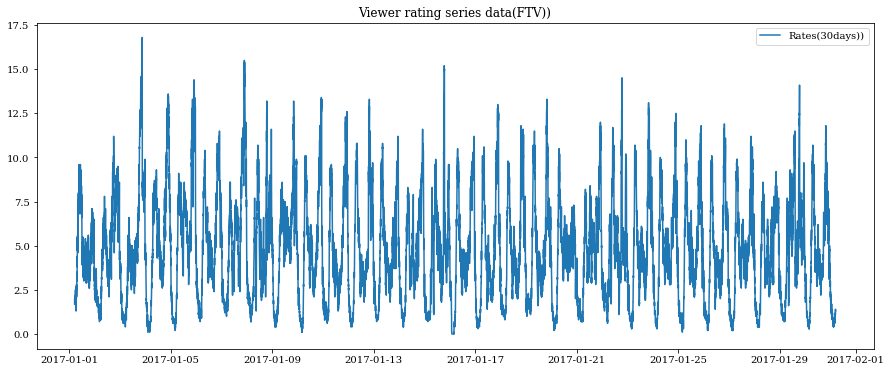

In [8]:
#30日間視聴率
plt.plot(df_ftv_rates[1:1440*30]["視聴率（世帯）"], label='Rates(30days))')
plt.title('Viewer rating series data(FTV))')
plt.legend(loc='best')

In [8]:
from statsmodels.tsa.stattools import adfuller

# Dickey-Fuller test 結果と標準偏差、平均のプロット
def test_stationarity(timeseries, window_size=12):
    # Determing rolling statistics
    rolmean = timeseries.rolling(window=window_size,center=False).mean()
    rolstd = timeseries.rolling(window=window_size,center=False).std()

    # Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    # Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value',
                                             '#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

In [9]:
###
###学習データを切り取る
###

#ts=df_ftv_rates["視聴率（世帯）"][0:1440*31]

df_loc=df_ftv_rates.loc[(df_ftv_rates['曜日'] == '月')]
locs=df_loc.index.indexer_at_time('21:00:00')
ts_loc=df_loc.iloc[locs]
ts=ts_loc["視聴率（世帯）"]
ts_loc
#按照时间（h:m:s）条件对使用datetimeIndex或datetime类型列的数据进行筛选
#https://www.codeleading.com/article/35911716332/

,視聴率（世帯）,曜日
datetime,,
2017-01-02 21:00:00,7.9,月
2017-01-09 21:00:00,5.5,月
2017-01-16 21:00:00,8.8,月
2017-01-23 21:00:00,8.1,月
2017-01-30 21:00:00,6.9,月
...,...,...
2019-12-02 21:00:00,11.5,月
2019-12-09 21:00:00,8.8,月
2019-12-16 21:00:00,9.8,月


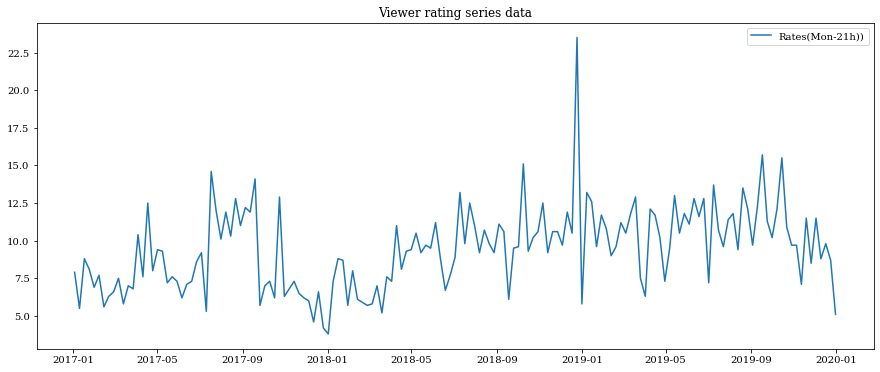

In [10]:

plt.plot(ts, label='Rates(Mon-21h))')
plt.title('Viewer rating series data')
plt.legend(loc='best')

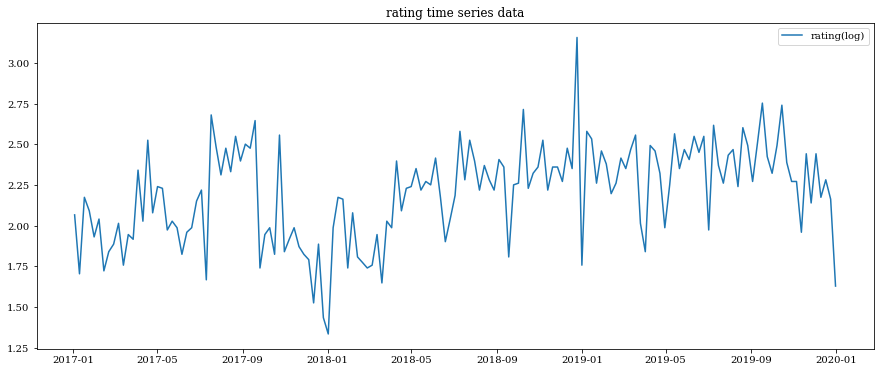

In [11]:
#対数をとって傾向を確認

ts_log = np.log(ts)
plt.plot(ts_log, label='rating(log)')
plt.title('rating time series data')
plt.legend(loc='best')

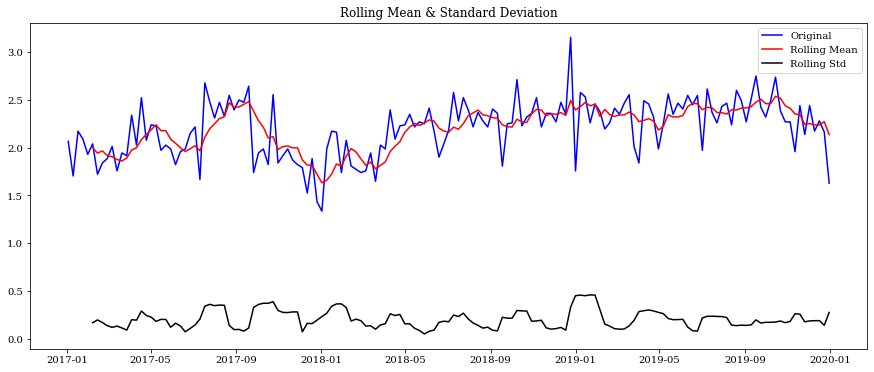

Results of Dickey-Fuller Test:
Test Statistic                  -2.909124
p-value                          0.044297
#Lags Used                       3.000000
Number of Observations Used    153.000000
Critical Value (1%)             -3.473830
Critical Value (5%)             -2.880623
Critical Value (10%)            -2.576945
dtype: float64


In [12]:
'''
定常性をチェックするための統計的テストの1つ。
ここで、帰無仮説は、ts が非定常であるということ。
テスト結果は、「検定統計量(Test Statistic)」と1,5,10%の信頼水準の「臨界値(Critical Value)」から構成されます。
「検定統計量」が「臨界値」よりも小さい場合は、帰無仮説を棄却して系列が定常状態と判定。

'''

test_stationarity(ts_log, window_size=6)


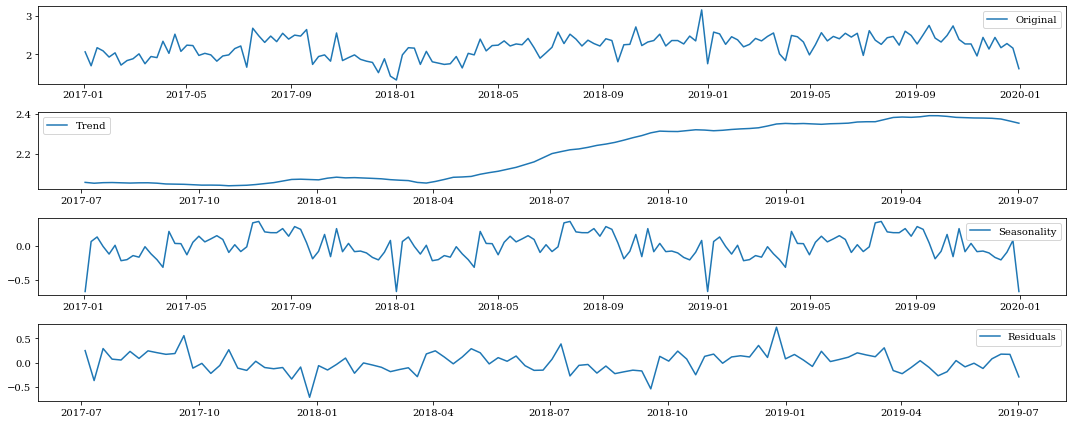

In [13]:
# 傾向(trend)、季節性(seasonal)、残差(residual)に分解してモデル化する。
# https://momonoki2017.blogspot.com/2018/03/python6.html
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(ts_log)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid


# オリジナルの時系列データプロット
# 411=グラフ4行1列の1番目の位置（一番上）
plt.subplot(411)
plt.plot(ts_log, label='Original')
plt.legend(loc='best')
 
# trend のプロット
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
 
# seasonal のプロット
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
 
# residual のプロット
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

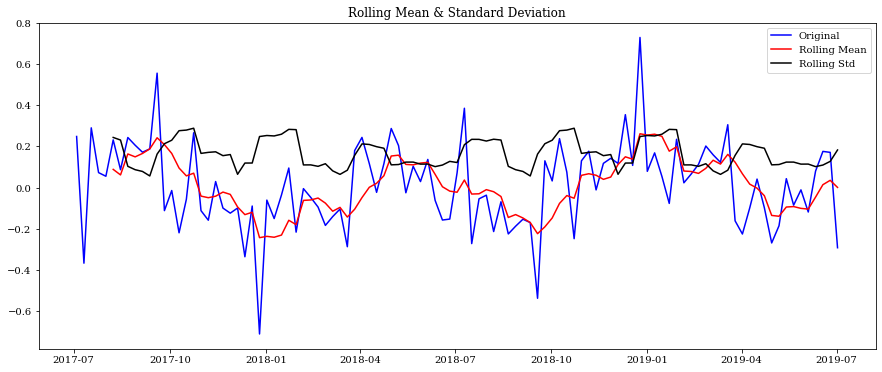

Results of Dickey-Fuller Test:
Test Statistic                 -2.843769
p-value                         0.052289
#Lags Used                      5.000000
Number of Observations Used    99.000000
Critical Value (1%)            -3.498198
Critical Value (5%)            -2.891208
Critical Value (10%)           -2.582596
dtype: float64


In [14]:
"""
傾向、季節性がデータから分離され、残差をモデル化できることがわかる。
そこで、残差の定常性をチェックできる。
"""
ts_log_decompose = residual
ts_log_decompose.dropna(inplace=True)
test_stationarity(ts_log_decompose, window_size=6)

In [15]:
ts_log_diff = ts_log - ts_log.shift()

#ACF and PACF plots:
from statsmodels.tsa.stattools import acf, pacf

lag_acf = acf(ts_log_diff, nlags=20)
lag_pacf = pacf(ts_log_diff, nlags=20, method='ols')

#Plot ACF: 
plt.subplot(121) 
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

#Plot PACF:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:541: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)


LinAlgError: SVD did not converge in Linear Least Squares

In [16]:
# 総当たりで、AICが最小となるSARIMAの次数を探す
max_p = 3
max_q = 3
max_d = 1
max_sp = 1
max_sq = 1
max_sd = 1

pattern = max_p*(max_q + 1)*(max_d + 1)*(max_sp + 1)*(max_sq + 1)*(max_sd + 1)

modelSelection = pd.DataFrame(index=range(pattern), columns=["model", "aic"])
pattern

192

In [17]:
import statsmodels.api as sm

# 自動SARIMA選択
num = 0

for p in range(1, max_p + 1):
    for d in range(0, max_d + 1):
        for q in range(0, max_q + 1):
            for sp in range(0, max_sp + 1):
                for sd in range(0, max_sd + 1):
                    for sq in range(0, max_sq + 1):
                        sarima = sm.tsa.SARIMAX(
                            ts, order=(p,d,q), 
                            seasonal_order=(sp,sd,sq,6), 
                            enforce_stationarity = False, 
                            enforce_invertibility = False
                        ).fit()
                        modelSelection.iloc[num]["model"] = "order=(" + str(p) + ","+ str(d) + ","+ str(q) + "), season=("+ str(sp) + ","+ str(sd) + "," + str(sq) + ")"
                        modelSelection.iloc[num]["aic"] = sarima.aic
                        num = num + 1

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  % freq, ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  % freq, ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  % freq, ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  % freq, ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  % freq, ValueWarn

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  % freq, ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  % freq, ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  % freq, ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  % freq, ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  % freq, ValueWarn

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  % freq, ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  % freq, ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  % freq, ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  % freq, ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", Convergen

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  % freq, ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  % freq, ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  % freq, ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  % freq, ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  % freq, ValueWarn

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  % freq, ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  % freq, ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  % freq, ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", Con

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  % freq, ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  % freq, ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  % fre

In [18]:
# モデルごとの結果確認
print(modelSelection)
# AIC最小モデル
print(modelSelection[modelSelection.aic == min(modelSelection.aic)])

                             model      aic
0    order=(1,0,0), season=(0,0,0)  805.347
1    order=(1,0,0), season=(0,0,1)   780.17
2    order=(1,0,0), season=(0,1,0)  795.464
3    order=(1,0,0), season=(0,1,1)  711.573
4    order=(1,0,0), season=(1,0,0)  780.216
..                             ...      ...
187  order=(3,1,3), season=(0,1,1)  675.773
188  order=(3,1,3), season=(1,0,0)  695.478
189  order=(3,1,3), season=(1,0,1)  690.295
190  order=(3,1,3), season=(1,1,0)  720.436
191  order=(3,1,3), season=(1,1,1)  682.861

[192 rows x 2 columns]
                             model      aic
123  order=(2,1,3), season=(0,1,1)  671.817


In [19]:
import statsmodels.api as sm

p=2
d=1
q=3
sp=0
sd=1
sq=1

sarima = sm.tsa.SARIMAX(
    ts, order=(p,d,q), 
    seasonal_order=(sp,sd,sq,6), 
    enforce_stationarity = False, 
    enforce_invertibility = False
).fit()
# 結果確認
print(sarima.summary())

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  % freq, ValueWarning)


                                 Statespace Model Results                                
Dep. Variable:                           視聴率（世帯）   No. Observations:                  157
Model:             SARIMAX(2, 1, 3)x(0, 1, 1, 6)   Log Likelihood                -328.909
Date:                           Mon, 02 Mar 2020   AIC                            671.817
Time:                                   09:48:07   BIC                            692.409
Sample:                               01-02-2017   HQIC                           680.185
                                    - 12-30-2019                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.9041      0.045    -42.743      0.000      -1.991      -1.817
ar.L2         -0.9567      0.042    -22.732

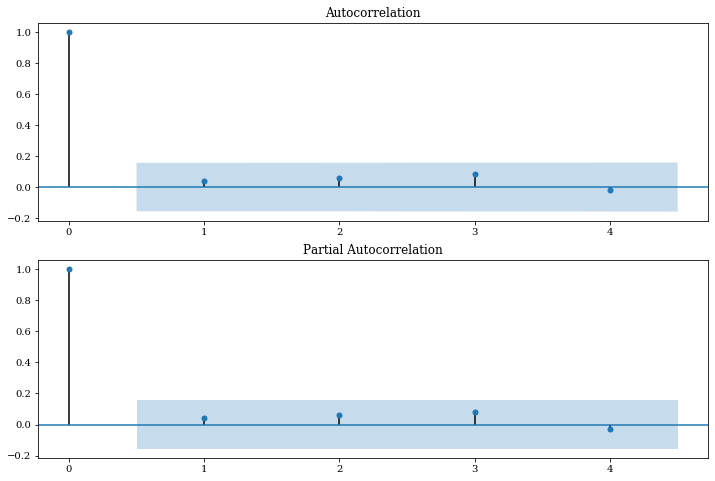

In [20]:
# 残差のチェック
residSARIMA = sarima.resid
fig = plt.figure(figsize=(12,8))

# 自己相関
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(residSARIMA, lags=4, ax=ax1)

# 偏自己相関
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(residSARIMA, lags=4, ax=ax2)

# 残差の自己相関については、ほぼ問題なくなったことを確認

In [28]:
# 予測
ts_pred = sarima.predict('2019-01-01', '2019-12-30')

2019-01-07 21:00:00    12.725063
2019-01-14 21:00:00    11.645321
2019-01-21 21:00:00    11.895889
2019-01-28 21:00:00    13.099399
2019-02-04 21:00:00    11.642579
2019-02-11 21:00:00    12.461691
2019-02-18 21:00:00     9.491897
2019-02-25 21:00:00    12.168396
2019-03-04 21:00:00     8.608395
2019-03-11 21:00:00    13.244305
2019-03-18 21:00:00    10.075111
2019-03-25 21:00:00    12.591886
2019-04-01 21:00:00     9.079225
2019-04-08 21:00:00    10.809486
2019-04-15 21:00:00     8.628357
2019-04-22 21:00:00    12.114922
2019-04-29 21:00:00    10.797175
2019-05-06 21:00:00     9.421083
2019-05-13 21:00:00     9.470350
2019-05-20 21:00:00    10.137375
2019-05-27 21:00:00    10.775130
2019-06-03 21:00:00    10.745853
2019-06-10 21:00:00    12.442571
2019-06-17 21:00:00     9.770919
2019-06-24 21:00:00    12.311060
2019-07-01 21:00:00    10.800298
2019-07-08 21:00:00    11.434546
2019-07-15 21:00:00    11.301891
2019-07-22 21:00:00    12.536844
2019-07-29 21:00:00    10.061278
2019-08-05

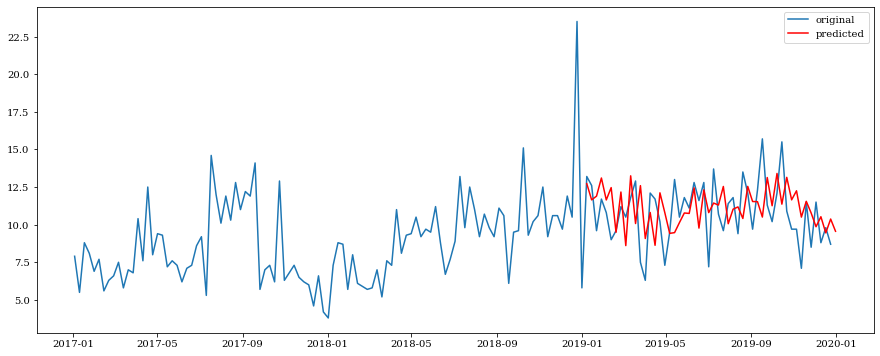

In [30]:
# 実データと予測結果の図示
plt.plot(ts[-365:-1], label='original')
plt.plot(ts_pred, label='predicted', color='red')
plt.legend(loc='best')


print(ts_pred)